In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function_to_minimize(point):
    x = point[0]
    y = point[1]
    return np.sin(y) * np.exp((1 - np.cos(x))**2) + np.cos(x) * np.exp((1 - np.sin(y))**2) + (x - y)**2

## Реализация

In [3]:
domain_min = 0
domain_max = 11
def fix(point):
    point[0] = domain_max if point[0] > domain_max else point[0]
    point[0] = domain_min if point[0] < domain_min else point[0]
    point[1] = domain_max if point[1] > domain_max else point[1]
    point[1] = domain_min if point[1] < domain_min else point[1]
    return point

In [4]:
def f_on_list(points_set):
    fx_x = []
    for p in points_set:
        fx_x.append((function_to_minimize(p), p))
    return fx_x

def reflected_point(centr, worse, alpha):
    return fix(centr + alpha * (centr - worse))
     
def expanded_point(centr, reflected, best, gamma):
    return fix(centr + gamma * (reflected - centr))

def contracted_point(centr, worse, rho):
    return fix(centr + rho * (worse - centr))
    
def shrink(points, sigma):
    p1 = points[0] + sigma * (points[1] - points[0])
    p2 = points[0] + sigma * (points[1] - points[0])
    points[1] = fix(p1)
    points[2] = fix(p2)

In [5]:
def Nelder_Mead_iteration(fx_x, alpha, gamma, rho, sigma):
    points_set = []
    for f, point in fx_x:
        points_set.append(point)
    
    fx_x = sorted(fx_x, key=lambda x : x[0])
    centroid = 1/2 * (fx_x[0][1] + fx_x[1][1])
    
#     reflection
    reflected = reflected_point(centroid, fx_x[2][1], alpha)
    if fx_x[0][0] <= function_to_minimize(reflected) <= fx_x[1][0] :
        fx_x[2] = (function_to_minimize(reflected), reflected)
        return fx_x
    
#     expansion
    if function_to_minimize(reflected) < fx_x[0][0]:
        expanded = expanded_point(centroid, reflected, fx_x[0][1], rho)
        if function_to_minimize(expanded) < function_to_minimize(reflected):
            fx_x[2] = (function_to_minimize(expanded), expanded)
        else:
            fx_x[2] = (function_to_minimize(reflected), reflected)
        return fx_x
    
#     contraction
    contracted = contracted_point(centroid, fx_x[2][1], rho)
    if function_to_minimize(contracted) < fx_x[2][0]:
        fx_x[2] = (function_to_minimize(contracted), contracted)
        return fx_x
    
    shrink(points_set, sigma)
    fx_x = f_on_list(points_set)
    return fx_x

In [6]:
points_set = [np.array([1,1]), np.array([2,1]), np.array([1,2])]
fx_x = f_on_list(points_set)
print(fx_x)

Nelder_Mead_iteration(fx_x, 1, 2, 1/2, 1/2)

[(1.5935304908570131, array([1, 1])), (6.8250541015507, array([2, 1])), (2.668029910392828, array([1, 2]))]


[(1.5935304908570131, array([1, 1])),
 (2.668029910392828, array([1, 2])),
 (2.3839536027644996, array([1.5 , 1.25]))]

In [7]:
def split_fx_x_to_x_y(fx_x):
    x = []
    y = []
    for f, point in fx_x:
        x.append(point[0])
        y.append(point[1])
    return x, y

## Пример, когда из разных стартовых точек сходимся в разные точки

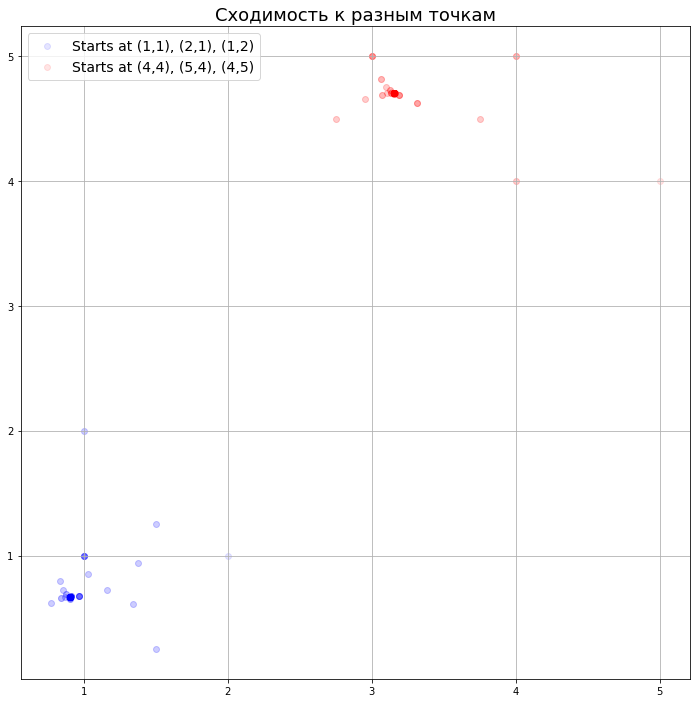

In [19]:
points_set = [np.array([1,1]), np.array([2,1]), np.array([1,2])]
points_set2 = [np.array([4,4]), np.array([5,4]), np.array([4,5])]
fx_x = f_on_list(points_set)
fx_x2 = f_on_list(points_set2)
plt.figure(figsize=(12,12))
for i in range(100):
    x, y = split_fx_x_to_x_y(fx_x)
    if (i == 99):
        plt.scatter(x, y, color="blue", alpha=0.1, label="Starts at (1,1), (2,1), (1,2)")
    else:
        plt.scatter(x, y, color="blue", alpha=0.1)
    
    x, y = split_fx_x_to_x_y(fx_x2)
    if (i == 99):
        plt.scatter(x, y, color="red", alpha=0.1, label="Starts at (4,4), (5,4), (4,5)")
    else:
        plt.scatter(x, y, color="red", alpha=0.1)
    
    fx_x2 = Nelder_Mead_iteration(fx_x2, 1, 2, 1/2, 1/2)
    fx_x = Nelder_Mead_iteration(fx_x, 1, 2, 1/2, 1/2)
plt.grid(";")
plt.title("Сходимость к разным точкам", fontsize=18)
plt.legend(fontsize=14)
plt.show()

## Пример, когда с разными параметрами сходимся в разные точки

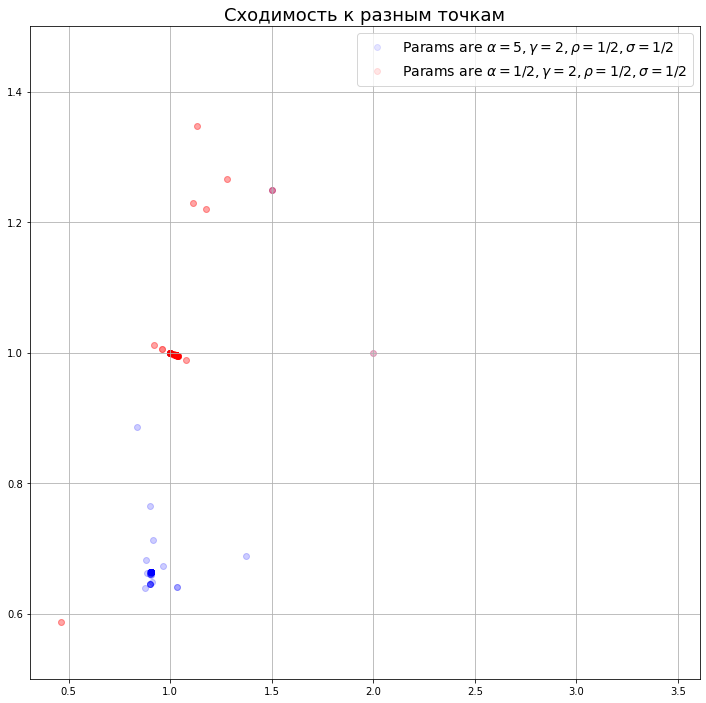

In [20]:
points_set = [np.array([1,1]), np.array([2,1]), np.array([1,2])]
fx_x = f_on_list(points_set)
fx_x2 = f_on_list(points_set)
plt.figure(figsize=(12,12))
for i in range(100):
    x, y = split_fx_x_to_x_y(fx_x)
    if (i == 99):
        plt.scatter(x, y, color="blue", alpha=0.1, label="Params are $\\alpha=5, \\gamma=2, \\rho=1/2, \\sigma=1/2$")
    else:
        plt.scatter(x, y, color="blue", alpha=0.1)
    
    x, y = split_fx_x_to_x_y(fx_x2)
    if (i == 99):
        plt.scatter(x, y, color="red", alpha=0.1, label="Params are $\\alpha=1/2, \\gamma=2, \\rho=1/2, \\sigma=1/2$")
    else:
        plt.scatter(x, y, color="red", alpha=0.1)
    plt.scatter(x, y, color="red", alpha=0.1)
    
    fx_x2 = Nelder_Mead_iteration(fx_x2, 5, 2, 1/2, 1/2)
    fx_x = Nelder_Mead_iteration(fx_x, 1/2, 2, 1/2, 1/2)
plt.grid(";")
plt.title("Сходимость к разным точкам", fontsize=18)
plt.legend(fontsize=14)
plt.ylim((0.5, 1.5))
plt.show()